**Aim**

To find the dominant colours in any given image such that the image can be defined using only those colours while preserving the overall image appearance, hence solving the problem of hardware or memory limitation.

**Implementation**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

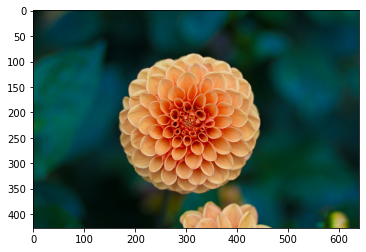

In [ ]:
n_colors = 5
clusters = 5
img = load_sample_image("flower.jpg")
plt.imshow(img)

In [ ]:
print('Orginal image shape --> ',img.shape)

Orginal image shape -->  (427, 640, 3)


In [ ]:
img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)

After resizing shape -->  (200, 299, 3)


In [ ]:
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)

After Flattening shape -->  (59800, 3)


In [ ]:
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

KMeans(n_clusters=5, random_state=0)

In [ ]:
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')
dominant_colors

array([[  2,  71,  72],
       [223, 170, 112],
       [203, 126,  67],
       [  7,  38,  29],
       [176,  57,  16]], dtype=uint64)

In [ ]:
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

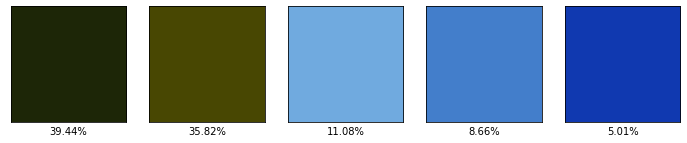

In [ ]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
  #  block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib)
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

([], <a list of 0 Text major ticklabel objects>)

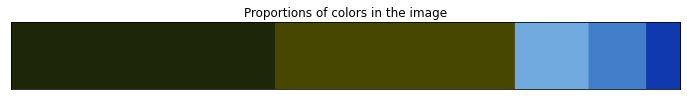

In [ ]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1
plt.imshow(bar)
plt.xticks([])
plt.yticks([])

In [ ]:
rows = 1000
cols = int((img.shape[0]/img.shape[1])*rows)
img = cv2.resize(img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

In [ ]:
copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

array([[[ 3, 18, 13],
        [ 3, 18, 13],
        [ 4, 19, 13],
        ...,
        [ 1, 75, 64],
        [ 1, 75, 64],
        [ 1, 75, 64]],

       [[ 3, 18, 13],
        [ 3, 18, 13],
        [ 4, 19, 13],
        ...,
        [ 1, 75, 64],
        [ 1, 75, 64],
        [ 1, 75, 64]],

       [[ 3, 18, 13],
        [ 3, 18, 13],
        [ 4, 19, 13],
        ...,
        [ 1, 75, 65],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       ...,

       [[ 1, 47, 40],
        [ 1, 47, 40],
        [ 1, 47, 39],
        ...,
        [ 7, 44, 26],
        [ 8, 43, 27],
        [ 8, 43, 27]],

       [[ 1, 47, 40],
        [ 1, 47, 40],
        [ 1, 47, 39],
        ...,
        [ 7, 44, 27],
        [ 8, 44, 27],
        [ 8, 44, 27]],

       [[ 1, 47, 40],
        [ 1, 47, 40],
        [ 1, 47, 39],
        ...,
        [ 7, 44, 27],
        [ 8, 44, 27],
        [ 8, 44, 27]]], dtype=uint8)

In [ ]:
final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)

array([[[ 3, 18, 13],
        [ 3, 18, 13],
        [ 4, 19, 13],
        ...,
        [ 1, 75, 64],
        [ 1, 75, 64],
        [ 1, 75, 64]],

       [[ 3, 18, 13],
        [ 3, 18, 13],
        [ 4, 19, 13],
        ...,
        [ 1, 75, 64],
        [ 1, 75, 64],
        [ 1, 75, 64]],

       [[ 3, 18, 13],
        [ 3, 18, 13],
        [ 4, 19, 13],
        ...,
        [ 1, 75, 65],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       ...,

       [[ 1, 47, 40],
        [ 1, 47, 40],
        [ 1, 47, 39],
        ...,
        [ 7, 44, 26],
        [ 8, 43, 27],
        [ 8, 43, 27]],

       [[ 1, 47, 40],
        [ 1, 47, 40],
        [ 1, 47, 39],
        ...,
        [ 7, 44, 27],
        [ 8, 44, 27],
        [ 8, 44, 27]],

       [[ 1, 47, 40],
        [ 1, 47, 40],
        [ 1, 47, 39],
        ...,
        [ 7, 44, 27],
        [ 8, 44, 27],
        [ 8, 44, 27]]], dtype=uint8)

In [ ]:
start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

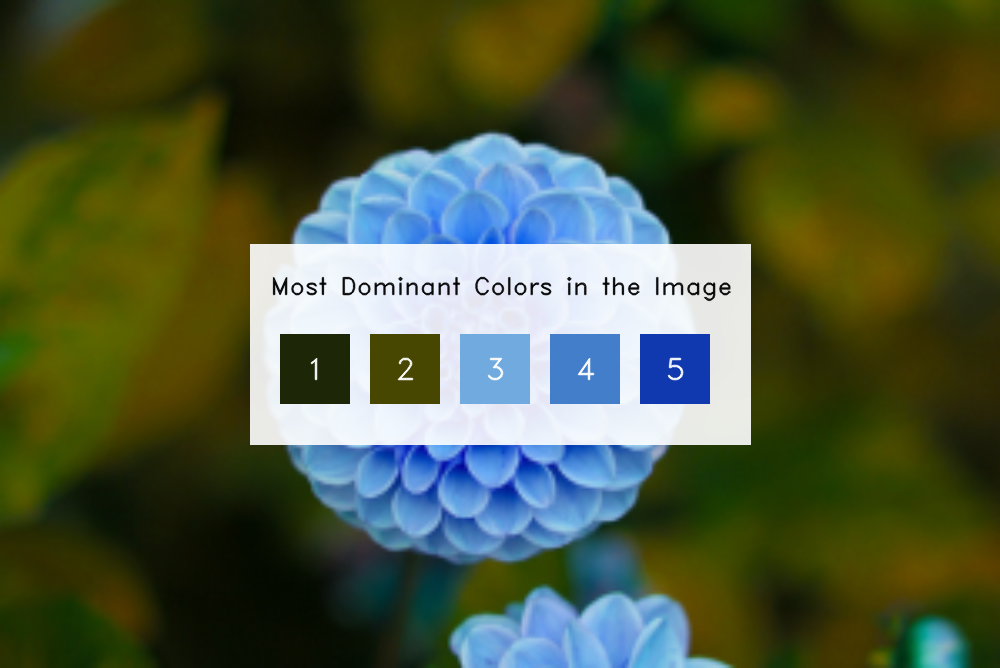

True

In [ ]:
plt.show()
cv2_imshow(final)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('output.png',final)

In [ ]:
img = np.array(img, dtype=np.float64) / 255

In [ ]:
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))

In [ ]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")


Fitting model on a small sub-sample of the data
done in 0.089s.


In [ ]:
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.036s.


In [ ]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.126s.


In [ ]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

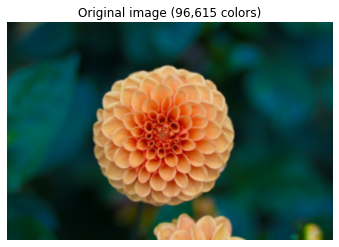

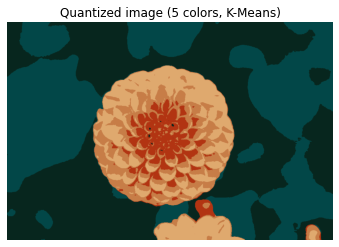

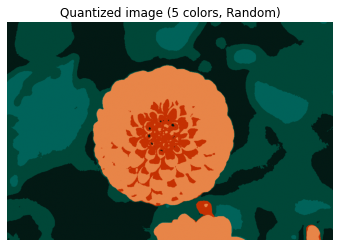

In [ ]:
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(img)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

**Conclusion**

Colour Quantization using K-means Clustering from OpenCV Library is applied on the input image.  

The image obtained using K-means clustering consists of K-dominant colours, such that its image quality is as preserved as possible with respect to the original input image.

Therefore, 5 dominant colours are chosen out of the total 96,615 colours in the input image and it is reconstructed to resemble the original image as closely as possible.

It is also observed that the image obtained using K-means clustering with dominant colours is notably finer than the image obtained using random colours.




**Application**

Since the image is displayed using only a selected number of dominant colours while preserving the original quality of the image, colour quantization can be used to display an image on hardware that supports a limited number of colours.

Colour quantization can also be applied in areas where memory space is restricted or where confining is needed.

Moreover, colour quantization helps in compressing an image since we are displaying the image using only dominant colours.  Hence, it is useful in image compression with minimal loss in quality and in reducing the memory space needed to save the image.